# UK Train data Jan - Apr 2024
This mock train ticket data for National Rail in the UK, from Jan to Apr 2024, was provided by Maven Analytics. The dataset was downloaded from here:
https://mavenanalytics.io/data-playground?page=3&pageSize=5

In [1]:
# imprting necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# loading the CSV into a dataframe and checking the basic information about the dataset and datatypes
df = pd.read_csv('railway.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [3]:
df.shape

(31653, 18)

The dataset contains **31653 records**.

Most fields match the number of records and do not contain non-null values.

However, some fields do have nulls.

Railcard field has **only 10735** values.

Actual Arrival Time has **29773** values.

Reason for Delay has **4172** values.

Regarding datatypes, times and dates (object) need to be joined into one field and converted into datetime dtype.

In [4]:
# taking a look at the dataset
df.sample(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
5967,4b694b95-0343-45d8-bc1a,2024-01-23,08:05:56,Online,Credit Card,Disabled,Standard,Advance,15,Birmingham New Street,London St Pancras,2024-01-24,06:30:00,07:50:00,07:50:00,On Time,NaN,No
2658,8e3e6f27-a4b7-40bf-badd,2024-01-11,10:42:19,Online,Contactless,NaN,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,2024-01-11,12:00:00,13:20:00,13:20:00,On Time,NaN,No
19117,178049ea-5dde-47d1-876e,2024-03-13,18:03:40,Station,Debit Card,Adult,Standard,Advance,56,Manchester Piccadilly,London Euston,2024-03-14,17:30:00,19:20:00,19:47:00,Delayed,Technical Issue,Yes
29960,882bd2e2-1411-4dd9-beca,2024-04-24,05:26:47,Online,Contactless,Adult,Standard,Advance,23,London Kings Cross,York,2024-04-25,03:45:00,05:35:00,05:35:00,On Time,NaN,No
15722,f5b2c40c-6fdd-4bbf-bc0c,2024-02-27,14:05:52,Station,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-02-28,12:30:00,13:50:00,13:50:00,On Time,NaN,No
8062,5df49d6a-7844-4cf0-8471,2024-01-31,01:10:46,Station,Contactless,NaN,First Class,Off-Peak,78,London Euston,Birmingham New Street,2024-01-31,23:30:00,00:50:00,00:50:00,On Time,NaN,No
23642,5c546738-8b4d-4a12-9706,2024-03-31,02:10:53,Online,Contactless,NaN,Standard,Off-Peak,53,London Kings Cross,York,2024-03-31,03:30:00,05:20:00,05:20:00,On Time,NaN,No
30589,6c93bed4-dc9b-4941-aecf,2024-04-26,14:10:16,Online,Contactless,NaN,Standard,Off-Peak,19,Reading,London Paddington,2024-04-26,15:30:00,15:55:00,15:55:00,On Time,NaN,No
21691,b93db735-c776-491f-b3b9,2024-03-23,12:07:18,Online,Contactless,Adult,Standard,Advance,2,Manchester Piccadilly,Liverpool Lime Street,2024-03-24,10:30:00,11:00:00,11:00:00,On Time,NaN,No
26755,370624c2-12d9-417d-920e,2024-04-12,12:33:56,Station,Credit Card,Adult,Standard,Off-Peak,65,London Paddington,Liverpool Lime Street,2024-04-12,14:00:00,16:30:00,16:30:00,On Time,NaN,No


In [5]:
# checking for unique values in fields that are of "object" datatype to see any problems in categorical data
df.select_dtypes(include='object').apply(pd.Series.unique)

,0
Transaction ID,"[da8a6ba8-b3dc-4677-b176, b0cdd1b0-f214-4197-b..."
Date of Purchase,"[2023-12-08, 2023-12-16, 2023-12-19, 2023-12-2..."
Time of Purchase,"[12:41:11, 11:23:01, 19:51:27, 23:00:36, 18:22..."
Purchase Type,"[Online, Station]"
Payment Method,"[Contactless, Credit Card, Debit Card]"
Railcard,"[Adult, nan, Disabled, Senior]"
Ticket Class,"[Standard, First Class]"
Ticket Type,"[Advance, Off-Peak, Anytime]"
Departure Station,"[London Paddington, London Kings Cross, Liverp..."
Arrival Destination,"[Liverpool Lime Street, York, Manchester Picca..."


The fields Departure Station, Arrival Station and Reason for Delay need to be double checked for any spelling inconsistencies and correct categorisation.

# DATA CLEANING AND TRANSFORMATION STEPS

1.   check for duplicate based on the unique field Transaction ID
2.   change "date of purchase" to date and "time of purchase" to **datetime** datatype and create a new column for this datapoint
3. the same for "Date of Journey", "Departure Time", "Arrival Time", "Actual Arrival Time"
4. create a **day of the week column** for travel date and purchase date
5. missing "actual arrival time" ? --> all fields where this is missing were cancelled journeys
6. add a **delay** column that would show length of delay
7. create a **route** column to find the most popular routes
8. check spelling of station names and reasons for delay are uniform
9. Replace 'Yes/No' in 'refund request' column with 1 and 0 respectively
10. Nulls in the Railcard column need to be filled with 'No railcard'




In [6]:
# checking if there are any duplicates in the dataset
duplicates = df[df['Transaction ID'].duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Transaction ID, Date of Purchase, Time of Purchase, Purchase Type, Payment Method, Railcard, Ticket Class, Ticket Type, Price, Departure Station, Arrival Destination, Date of Journey, Departure Time, Arrival Time, Actual Arrival Time, Journey Status, Reason for Delay, Refund Request]
Index: []


No duplicates detected in the dataset.

In [7]:
# create a Datetime column for Purchase in datetime dtype
df["Purchase datetime"] = pd.to_datetime(df["Date of Purchase"] + " " + df["Time of Purchase"])

# create a Datetime column for the actual travel date and time in datetime dtype
df["Travel datetime"] = pd.to_datetime(df["Date of Journey"] + " " + df["Departure Time"])

# create a Datetime for scheduled arrival date
df["Scheduled arrival datetime"] = pd.to_datetime(df["Date of Journey"] + " " + df["Arrival Time"])

# create a datetime for actual arrival date
df["Actual arrival datetime"] = pd.to_datetime(df["Date of Journey"] + " " + df["Actual Arrival Time"])

In [8]:
# create a day of the week column for purchase date
df['Purchase day of week'] = df['Purchase datetime'].dt.day_name()

# create a day of the week for travel date
df['Travel day of week'] = df['Travel datetime'].dt.day_name()

In [9]:
# create a route column
df['Route'] = df['Departure Station'] + ' - ' + df['Arrival Destination']

In [10]:
# check that columns were added correctly
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,...,Journey Status,Reason for Delay,Refund Request,Purchase datetime,Travel datetime,Scheduled arrival datetime,Actual arrival datetime,Purchase day of week,Travel day of week,Route
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,...,On Time,NaN,No,2023-12-08 12:41:11,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,Friday,Monday,London Paddington - Liverpool Lime Street
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,...,Delayed,Signal Failure,No,2023-12-16 11:23:01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Saturday,Monday,London Kings Cross - York
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,...,On Time,NaN,No,2023-12-19 19:51:27,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,Tuesday,Tuesday,Liverpool Lime Street - Manchester Piccadilly
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,...,On Time,NaN,No,2023-12-20 23:00:36,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,Wednesday,Monday,London Paddington - Reading
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,...,On Time,NaN,No,2023-12-27 18:22:56,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,Wednesday,Monday,Liverpool Lime Street - London Euston


In [11]:
# check that departure station names are spelled uniformly
print(sorted(df['Departure Station'].unique()))


['Birmingham New Street', 'Bristol Temple Meads', 'Edinburgh Waverley', 'Liverpool Lime Street', 'London Euston', 'London Kings Cross', 'London Paddington', 'London St Pancras', 'Manchester Piccadilly', 'Oxford', 'Reading', 'York']


In [12]:
# check that arrival station names are spelled uniformly
print(sorted(df['Arrival Destination'].unique()))

['Birmingham New Street', 'Bristol Temple Meads', 'Cardiff Central', 'Coventry', 'Crewe', 'Didcot', 'Doncaster', 'Durham', 'Edinburgh', 'Edinburgh Waverley', 'Leeds', 'Leicester', 'Liverpool Lime Street', 'London Euston', 'London Kings Cross', 'London Paddington', 'London St Pancras', 'London Waterloo', 'Manchester Piccadilly', 'Nottingham', 'Nuneaton', 'Oxford', 'Peterborough', 'Reading', 'Sheffield', 'Stafford', 'Swindon', 'Tamworth', 'Wakefield', 'Warrington', 'Wolverhampton', 'York']


In [13]:
# check what reasons for delay are listed
df['Reason for Delay'].unique()

array([nan, 'Signal Failure', 'Technical Issue', 'Weather Conditions',
       'Weather', 'Staffing', 'Staff Shortage', 'Signal failure',
       'Traffic'], dtype=object)

In [14]:
# correct categores in 'reason for delay'column: 'weather conditions' were replaced with simply 'weather';
# 'staffing' and 'staffing shortage' were unified under 'staffing shortage';
# spelling for 'signal failure' was corrected
# check that the final spelling is correct and the number of unique values went down

df['Reason for Delay'] = df['Reason for Delay'].str.replace('Weather Conditions', 'Weather')
df['Reason for Delay'] = df['Reason for Delay'].str.replace('Staffing', 'Staff Shortage')
df['Reason for Delay'] = df['Reason for Delay'].str.replace('Signal failure', 'Signal Failure')
df['Reason for Delay'].unique()

array([nan, 'Signal Failure', 'Technical Issue', 'Weather',
       'Staff Shortage', 'Traffic'], dtype=object)

In [15]:
# replace 'Yes/No' in Refund Request column with 1 and 0
df['Refund Request'] = df['Refund Request'].map(lambda x : 1 if x == 'Yes' else 0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Transaction ID              31653 non-null  object        
 1   Date of Purchase            31653 non-null  object        
 2   Time of Purchase            31653 non-null  object        
 3   Purchase Type               31653 non-null  object        
 4   Payment Method              31653 non-null  object        
 5   Railcard                    10735 non-null  object        
 6   Ticket Class                31653 non-null  object        
 7   Ticket Type                 31653 non-null  object        
 8   Price                       31653 non-null  int64         
 9   Departure Station           31653 non-null  object        
 10  Arrival Destination         31653 non-null  object        
 11  Date of Journey             31653 non-null  object    

From data exploration with info() command, I noticed that some train rides do not have an 'actual arrival time' field.

In [17]:
# counting how many rides do not have actual arrival time
count_scheduled = df['Arrival Time'].notnull().sum()

count_actual_arr = df['Actual Arrival Time'].notnull().sum()

missing_actual_arr = count_scheduled - count_actual_arr
print(f"Number of missing values in 'Actual Arrival Time': {missing_actual_arr}")

Number of missing values in 'Actual Arrival Time': 1880


In [18]:
# checking Journey status to see if there is any chance that rides without actual arrival time were cancelled
df['Journey Status'].value_counts()

,count
Journey Status,
On Time,27481
Delayed,2292
Cancelled,1880


In conclusion, the rides that were cancelled, did not have the actual arrival date which explains that these missing data points do not need to be filled.

In [19]:
# replacing nulls in the Railcard data with 'No railcard'
df.fillna(value = {'Railcard': 'No railcard'}, inplace=True)

In [20]:
df['Railcard'].sample(10)

,Railcard
4506,No railcard
26766,No railcard
5130,No railcard
21308,Adult
22179,No railcard
2556,No railcard
21871,No railcard
13073,Senior
27936,Senior
28960,No railcard


# BUSINESS PROBLEM - DELAYS
The purpose of this analysis is to learn about the delays in order to improve the punctuality of trains.

# MAIN THEME
When and where do train delays most commonly occur, and what factors contribute to them?

# Sub-questions


1.   How many journeys experience a delay?
2.   What are the most common reasons for delay?
3. Which routes experience the most delay, and how severe are they? How do these routes rank on popularity?
4. When are delays most frequent during the day?
5. Is there a pattern of delays by day of week and time?
6. Do longer delays receive more refund requests?




# Route Analysis
- What are the most popular routes?

In [21]:
# the most popular routes in the dataset (by number of bookings) - to later compare whether any of the most popular routes are affected by delays
df['Route'].value_counts().sort_values(ascending=False).head(10)

,count
Route,
Manchester Piccadilly - Liverpool Lime Street,4628
London Euston - Birmingham New Street,4209
London Kings Cross - York,3922
London Paddington - Reading,3873
London St Pancras - Birmingham New Street,3471
Liverpool Lime Street - Manchester Piccadilly,3002
Liverpool Lime Street - London Euston,1097
London Euston - Manchester Piccadilly,712
Birmingham New Street - London St Pancras,702


# Delay Analysis
**Goal** - to understand how delays are distributed and which routes or times are most affected.

We calculate the delays time for each ride and add a delay column to the dataset.

**Analysis steps**:
- how many rides were delayed
- what is the breakdown of reasons for delay
- average delay by route
- delay vs. time of day
- delay frequency heatmap by day of week

# Exploratory Delay Analysis

In [22]:
# how many rides were delayed
delayed_trains = df['Reason for Delay'].notnull().sum()
print(f"Number of delayed trains: {delayed_trains}")

Number of delayed trains: 4172


In [23]:
# the total number of trains
total_trains = df.shape[0]

# percentage of delayed trains
percentage_delayed = (delayed_trains / total_trains) * 100

print(f"Percentage of delayed trains: {percentage_delayed:.2f}%")

Percentage of delayed trains: 13.18%


In [24]:
# calculate delay and add it as a column
df['Delay'] = df['Actual arrival datetime'] - df['Scheduled arrival datetime']

In [25]:
df['Delay'].describe()

,Delay
count,29773
mean,0 days 00:03:14.981358949
std,0 days 00:14:46.232314799
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,0 days 03:00:00


# What does the above show tell us about delays on UK trains?

When lloking at the whole dataset (inclusing rides that had no delay), the average delay time is **3 minutes 14 seconds** but standard deviation is **14 minutes 46 seconds** which shows a significant variation in data points. For example, the longest delay was **3 hrs**.

To be able to look at delay data in more depth, I will create a separate dataframe with only the rides that actually had a delay. Any ride that had 1 minute or more of delay, I will consider delayed.


In [26]:
# create a dataframe
delays_df = df[df['Delay'] >= pd.Timedelta(minutes=1)]

delays_df =df[df['Delay'] >= pd.Timedelta(minutes=1)].copy() # save acopy of delays sub- dataset

In [27]:
delays_df.shape

(2274, 26)

**2274 rides** were delayed.

In [28]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 1 to 31637
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Transaction ID              2274 non-null   object         
 1   Date of Purchase            2274 non-null   object         
 2   Time of Purchase            2274 non-null   object         
 3   Purchase Type               2274 non-null   object         
 4   Payment Method              2274 non-null   object         
 5   Railcard                    2274 non-null   object         
 6   Ticket Class                2274 non-null   object         
 7   Ticket Type                 2274 non-null   object         
 8   Price                       2274 non-null   int64          
 9   Departure Station           2274 non-null   object         
 10  Arrival Destination         2274 non-null   object         
 11  Date of Journey             2274 non-null   obj

In [29]:
# calculate the percentage of delayed rides in comparison to the whole dataset
delayed = delays_df.shape[0]

percentage_delayed = (delayed / total_trains) * 100

print(f"Percentage of delayed trains: {percentage_delayed:.2f}%")

Percentage of delayed trains: 7.18%


So, if we only focus on trains that were delayed by 1 minute or more, they make up **only 7,18%** of all trains that ran in the UK between January and April 2024.

To get a clearer perspective on the reliability of the trains in the UK, I created a donut chart that breaks down all train rides in the country across cancelled, delayed and on time/slightly delayed trains.

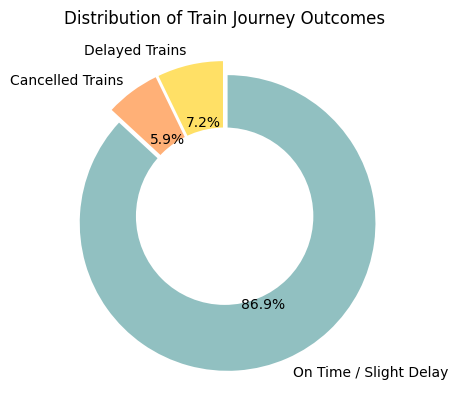

In [30]:
# donut graph of delayed trains, cancelled trains and the rest

# count of cancelled trains
сancelled_trains = df[df['Journey Status'] == 'Cancelled'].shape[0]

# count of trains that were on time or slightly delayed (not considered delayed in delays_df)
on_time_or_slight_delay = total_trains - delayed - cancelled_trains

# Data for the donut chart
sizes = [delayed, cancelled_trains, on_time_or_slight_delay]
labels = ['Delayed Trains', 'Cancelled Trains', 'On Time / Slight Delay']
colors = ['#ffe066','#ffb077','#91c0c1']
explode = (0.05, 0.05, 0.05)  # To slightly separate the slices

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Distribution of Train Journey Outcomes')
plt.show()

# EDA for delayed trains dataset

In [31]:
# check delay stats
delays_df['Delay'].describe()

,Delay
count,2274
mean,0 days 00:42:32.849604221
std,0 days 00:34:25.290313810
min,0 days 00:01:00
25%,0 days 00:19:00
50%,0 days 00:37:00
75%,0 days 00:53:00
max,0 days 03:00:00


In [32]:
# calculate the median delay
delays_df['Delay'].median()

Timedelta('0 days 00:37:00')

**Summary**

Out of the total number of rides, only **7.18%** experienced a significant delay (1 minute or more).

When looking at just the delayed rides, it is evident that the data is normally distributed with the **average of 42 min 32 sec** and **median of 37 min** which shows us the most delays are under one hour.

25% of delays are **less than 19 mins** and 75% of rides are under 53 mins delayed, which means that **the majority of delays did no exceed 1 hour**.

# Visualisations

Text(0.5, 1.0, 'Distribution of Train Delays')

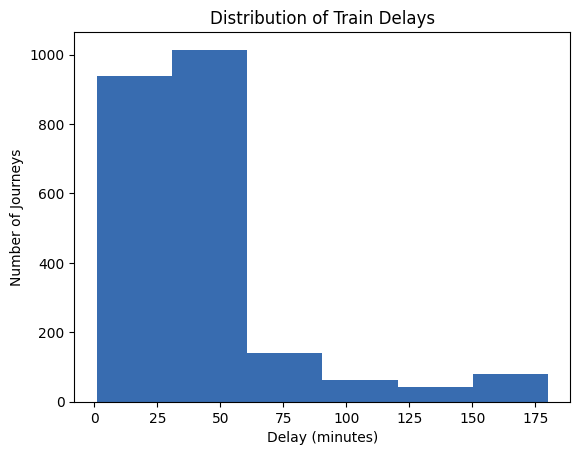

In [33]:
# histogram of distribution of delayed train rides
plt.hist(delays_df['Delay'].dt.total_seconds() / 60, bins=6, color=sns.color_palette('Accent')[4])
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of Journeys')
plt.title('Distribution of Train Delays')

In [34]:
# reasons for delay
delays_df['Reason for Delay'].value_counts()

,count
Reason for Delay,
Weather,921
Technical Issue,464
Signal Failure,451
Staff Shortage,352
Traffic,86


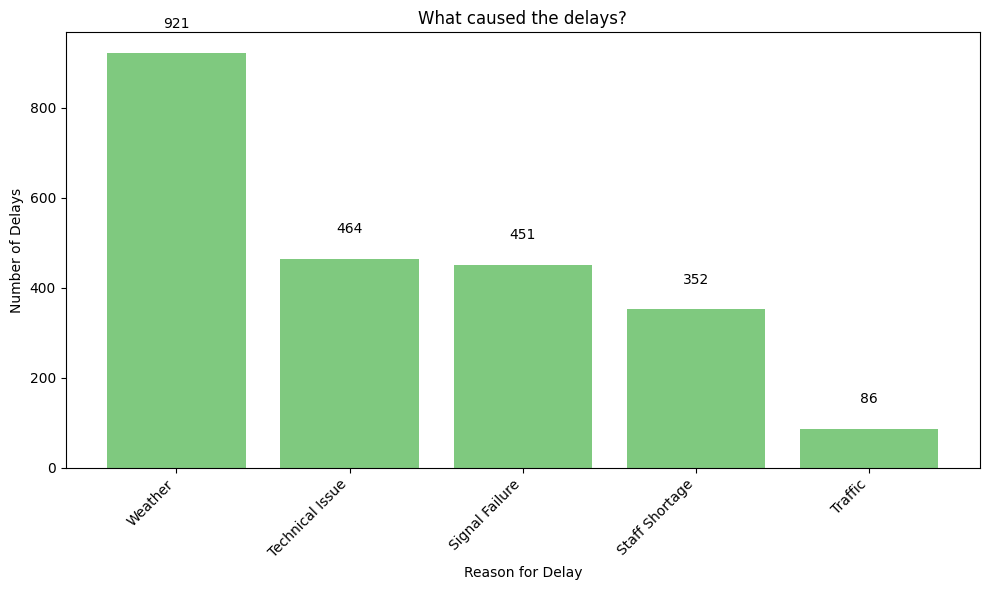

In [35]:
# bar chart with reasons for delay

# Get the counts of each reason for delay
reason_counts = delays_df['Reason for Delay'].value_counts().reset_index()
reason_counts.columns = ['Reason', 'Count']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(reason_counts['Reason'], reason_counts['Count'], color=sns.color_palette('Accent')[0])

# Add data labels
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom')

plt.xlabel('Reason for Delay')
plt.ylabel('Number of Delays')
plt.title('What caused the delays?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
delay_percentages = delays_df['Reason for Delay'].value_counts(normalize=True) * 100
print(delay_percentages)


Reason for Delay
Weather            40.501319
Technical Issue    20.404573
Signal Failure     19.832894
Staff Shortage     15.479332
Traffic             3.781882
Name: proportion, dtype: float64


Weather is the most frequent reason for delays (40% of all delays).

It is followed by tech issues (20.4%), signal failure (19.8 %) and staff shortages (15.4%). These can be addressed by the railways by improving tech support of trains and the rails, signals and hiring more staff to account for shortages.

In [37]:
# delays by the time of the day of travel
delays_df.groupby('Travel day of week')['Delay'].mean().sort_values(ascending=False)

,Delay
Travel day of week,
Sunday,0 days 00:45:02.980132450
Saturday,0 days 00:44:30.208333333
Friday,0 days 00:43:47.843137254
Wednesday,0 days 00:42:09.850746268
Tuesday,0 days 00:41:27.745664739
Monday,0 days 00:41:00.769230769
Thursday,0 days 00:40:40.831168831


<Axes: title={'center': 'Average Delay by Day of Week'}, xlabel='Travel day of week', ylabel='Avg Delay (min)'>

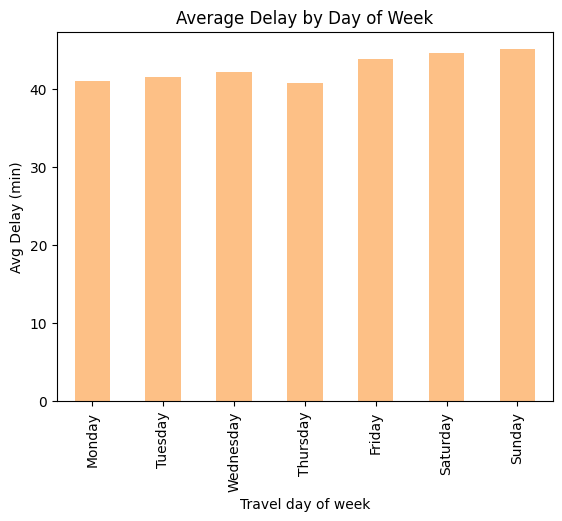

In [38]:
# plot delays by weekday
avg_delay = delays_df.groupby('Travel day of week')['Delay'].mean().dt.total_seconds() / 60
avg_delay = avg_delay.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

avg_delay.plot(kind='bar', ylabel='Avg Delay (min)', title='Average Delay by Day of Week', color=sns.color_palette('Accent')[2])

The above graph shows that **Friday, Saturday and Sunday** tend to have slightly longer delay averages.

# Delays by time of the day

In [39]:
# Create a column with just the time (no date)
delays_df['Departure Time'] = pd.to_datetime(delays_df['Departure Time'], format='%H:%M:%S').dt.time

# Convert to datetime.time
delays_df['Departure Minute'] = delays_df['Departure Time'].apply(lambda t: t.hour * 60 + t.minute)

# Custom time bins (in minutes)
bins = [0, 360, 720, 1080, 1440]  # midnight, 6am, 12pm, 6pm, midnight
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

delays_df['Time Bin'] = pd.cut(delays_df['Departure Minute'], bins=bins, labels=labels, right=False)


In [40]:
delays_df.groupby(['Time Bin'], observed= True)['Delay'].count().sort_values(ascending=False)

,Delay
Time Bin,
Morning,1330
Afternoon,738
Night,206


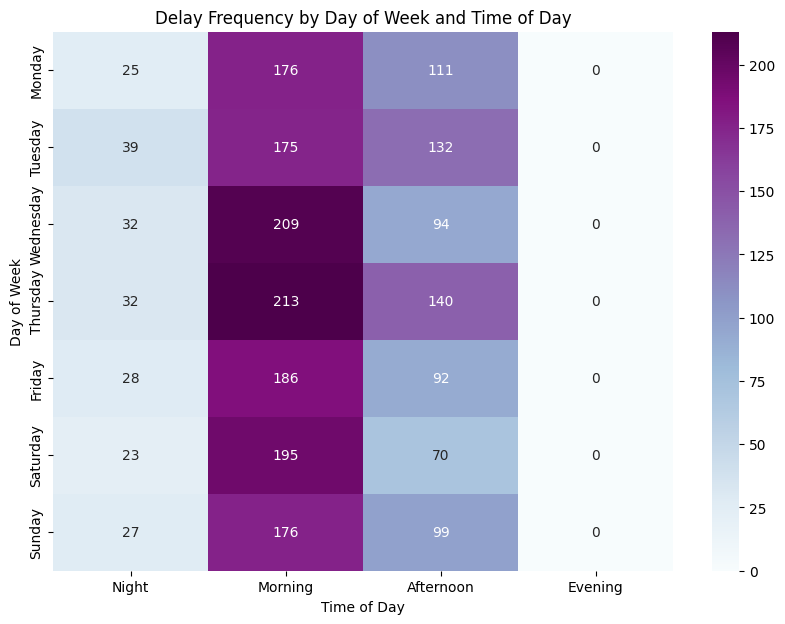

In [41]:
# heatmap delay frequency by day of week and time of the day(morning, afternoon, evening and night)

# Aggregate data to get delay frequency by day of week and time bin
delay_frequency = delays_df.groupby(['Travel day of week', 'Time Bin'], observed=False).size().unstack(fill_value=0)

# Define the order of the days of the week and time bins for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_bin_order = ['Night', 'Morning', 'Afternoon', 'Evening']

# Reindex the dataframe to ensure the correct order
delay_frequency = delay_frequency.reindex(index=day_order, columns=time_bin_order)

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(delay_frequency, annot=True, fmt='d', cmap='BuPu')

plt.title('Delay Frequency by Day of Week and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.show()


The most critical times when the trains are delayed are **Wednesday and Thursday mornings**.

# Routes with most delays

In [42]:
# average delay by route to identify the routes most affected by delays
delays_df.groupby('Route')['Delay'].mean().sort_values(ascending=False)

,Delay
Route,
Manchester Piccadilly - Leeds,0 days 02:23:44.062500
York - Doncaster,0 days 01:08:55.555555555
Manchester Piccadilly - Liverpool Lime Street,0 days 01:07:46.666666666
London Euston - Birmingham New Street,0 days 00:54:57.520661157
Manchester Piccadilly - Nottingham,0 days 00:53:47.142857142
Liverpool Lime Street - London Paddington,0 days 00:38:23.076923076
Liverpool Lime Street - London Euston,0 days 00:36:46.005154639
London Euston - York,0 days 00:36:21.176470588
London Paddington - Reading,0 days 00:35:37.272727272


**3 routes** are affected by delays that are longer than 1 hr on average.

The route *'London Euston - Birmingham New Street'* is also **2nd most popular** route in the country.

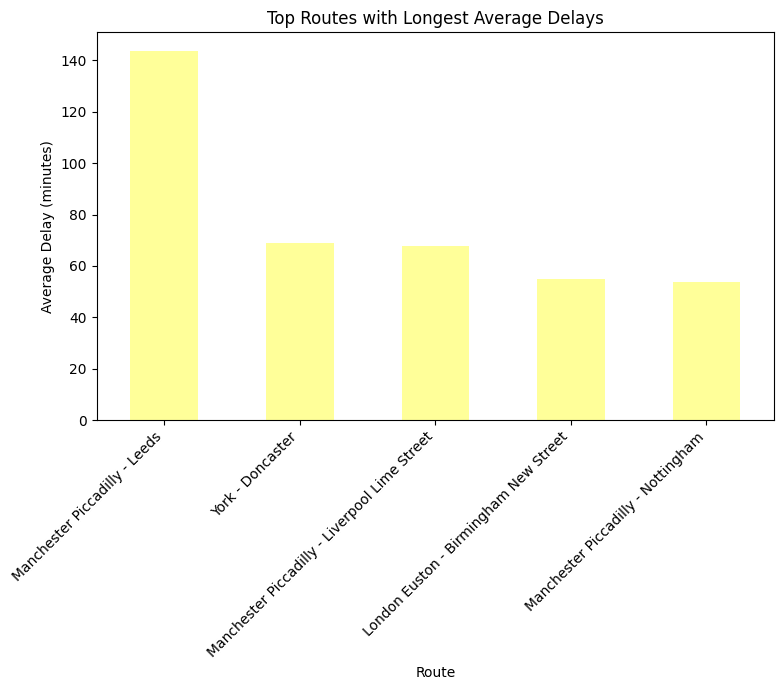

In [43]:
# bar chart of which route experience longest delays on average

# Group by route and calculate the average delay
avg_delay_by_route = delays_df.groupby('Route')['Delay'].mean().dt.total_seconds() / 60

# Select the top N routes with the longest average delays
top_n_routes = avg_delay_by_route.sort_values(ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(8, 7))
top_n_routes.plot(kind='bar', color=sns.color_palette('Accent')[3])


plt.xlabel('Route')
plt.ylabel('Average Delay (minutes)')
plt.title('Top Routes with Longest Average Delays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

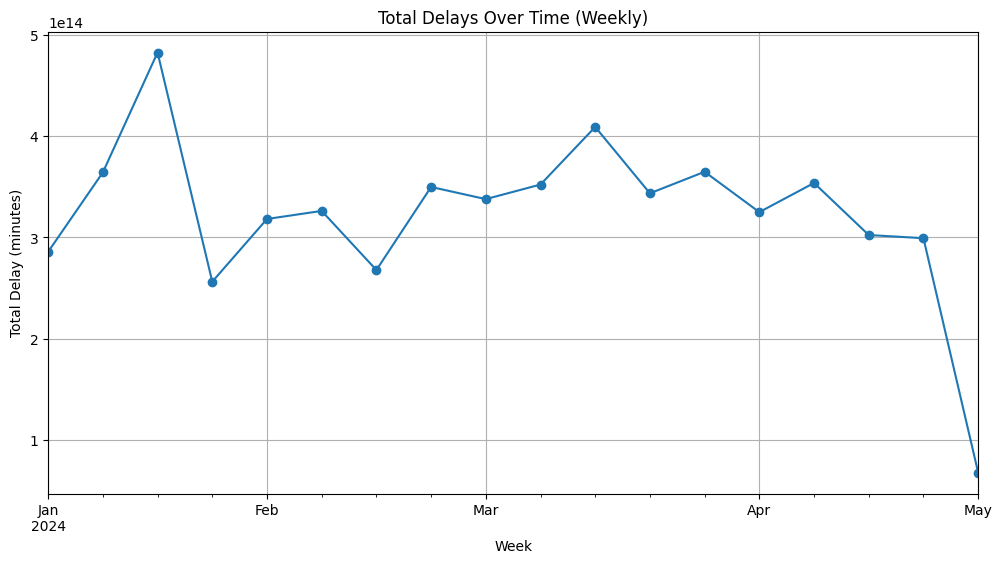

In [63]:
#how total delays change over time(weekly)

# Set 'Travel datetime' as the index for resampling
delays_df.set_index('Actual arrival datetime', inplace=True)

# Resample weekly (resample W) and sum the delays
weekly_delay = delays_df['Delay'].resample('W').sum()

# Plot the weekly total delay
plt.figure(figsize=(12, 6))
weekly_delay.plot(kind='line', marker='o', linestyle='-')
plt.title('Total Delays Over Time (Weekly)')
plt.xlabel('Week')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.show()

In [59]:
# checking the last datapoints in the dataset to check if May data is in there (because May appears on the graph)
delays_df['Travel datetime'].tail(15)

,Travel datetime
31307,2024-04-30 05:45:00
31336,2024-04-30 08:00:00
31337,2024-04-29 11:00:00
31346,2024-04-30 09:00:00
31404,2024-04-29 15:30:00
31405,2024-04-29 15:30:00
31427,2024-04-29 17:45:00
31428,2024-04-29 17:45:00
31430,2024-04-29 17:45:00
31542,2024-04-30 03:30:00


In [46]:
# count of refund requests in the delayed rides dataset
delays_df['Refund Request'].value_counts()

,count
Refund Request,
0,1736
1,538


In [69]:
# percentage of users that requested a refund
refund_perc = delays_df['Refund Request'].value_counts(normalize=True) * 100
print(refund_perc)

Refund Request
0    76.341249
1    23.658751
Name: proportion, dtype: float64


Just **under 24%** of delayed rides resulted in refund request from passengers.

In [47]:
# to better represent the length of delay, I will create a column with bins
# ('Under 30 mins', '31-60 mins', '1-2 hrs', 'More than 2 hrs')
delays_df['Delay_minutes'] = delays_df['Delay'].dt.total_seconds() / 60

# Define delay duration bins
delay_bins = [0, 30, 60, 120, delays_df['Delay_minutes'].max()]
delay_labels = ['Under 30 mins', '31-60 mins', '1-2 hrs', 'More than 2 hrs']

# Create a new column with delay duration bins
delays_df['Delay_Duration_Bin'] = pd.cut(delays_df['Delay_minutes'], bins=delay_bins, labels=delay_labels, right=True)


In [75]:
# what do requests look like by length of delay
delays_df.groupby(['Delay_Duration_Bin'], observed = False)['Refund Request'].sum()

,Refund Request
Delay_Duration_Bin,
Under 30 mins,431
31-60 mins,107
1-2 hrs,0
More than 2 hrs,0


<Figure size 1000x600 with 0 Axes>

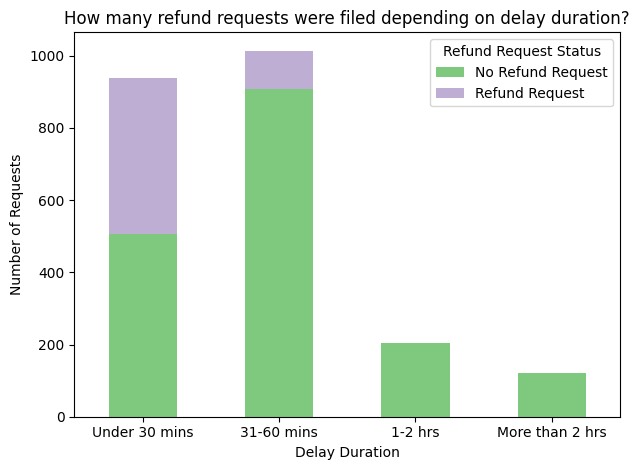

In [77]:
# a stacked bar chart to illustrate refund requests by delay duration

# Aggregate the data for the stacked bar chart
refund_requests_by_delay_bin = delays_df.groupby('Delay_Duration_Bin', observed = False)['Refund Request'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
refund_requests_by_delay_bin.columns = ['No Refund Request', 'Refund Request']

# set the order of bins
delay_bin_order = ['Under 30 mins', '31-60 mins', '1-2 hrs', 'More than 2 hrs']
refund_requests_by_delay_bin = refund_requests_by_delay_bin.reindex(delay_bin_order)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
refund_requests_by_delay_bin.plot(kind='bar', stacked=True, color=sns.color_palette('Accent', 2))

plt.title('How many refund requests were filed depending on delay duration?')
plt.xlabel('Delay Duration')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.legend(title='Refund Request Status')
plt.tight_layout()
plt.show()